# Funções empregadas no modelo

In [ ]:
import math
import numpy as np
import pandas as pd

In [ ]:
# Função para calcular o coeficiente de rendimento mecânico
def coeficiente_rendimento(i_c: float, a_c: float, y1: float, y2: float) -> float:
    """
    Esta função determina o coeficiente de rendimento mecânico da seção transversal.

    Args:
        i_c: Momento de inércia da seção bruta
        a_c: Área da seção transversal bruta
        y1: Distância da extremidade inferior até o centro geométrico
        y2: Distância da extremidade superior até o centro geométrico

    Rets:
        r: Coeficiente de rendimento mecânico da seção transversal
    """
    return i_c / (a_c * abs(y1) * abs(y2))

# Função para calcular a rigidez
def rigidez(pr: float, l: float, E: float, i_c: float) -> float:

    """
    Esta função determina a rigidez da seção transversal.

    Args:

    pr: Força no meio da viga (kN)
    l: Comprimento do vão (m)
    E: Módulo de elasticidade (kN/m²)
    i_c: Momento de inércia da seção bruta (m^4)

    Rets:

    delta: rigidez da viga

    """
    return (48 * E * i_c) / (pr * l ** 3)

def prop_geometrica(geom: list, tipo: str) -> tuple:

    """
    Função para calcular as propriedades geométricas de seções transversais retangulares,
    perfis I de abas paralelas e I de abas inclinadas.

    Args:
        geom: Lista com as dimensões do perfil.
        tipo: Tipo do perfil ('retangular', 'i tradicional', 'i aba inclinadas').

    Returns:
        tuple: Área, centroide, momento de inércia e módulos de resistência.
   """

    if tipo == 'retangular':
        base, altura = geom
        a_c = base * altura                     # Área da seção
        y_c = altura / 2                        # Centroide em y
        i_x = (base * altura**3) / 12           # Momento de inércia em x
        w_topo = w_base = i_x / y_c             # Módulo de resistência no topo e na base (iguais)

    elif tipo == 'i tradicional':
        bf_t, hf_t, bw, h, bf_b, hf_b = geom
        a_c = (bf_t * hf_t) + (bw * h) + (bf_b * hf_b)       # Área total do perfil

        # Centroide
        y_c = ((((hf_t/2) + h + hf_b) * bf_t * hf_t) + (((h/2) + hf_b) * bw * h) + ((hf_b/2) * bf_b * hf_b)) / a_c    #Centroide em y

        # Momentos de Inércia em x
        i_x_aba_t = (((bf_t * hf_t ** 3) /12) + (bf_t * hf_t) * ((hf_t/2 + h + hf_b) - y_c)**2)
        i_x_aba_b = (((bf_b * hf_b ** 3) /12) + (bf_b * hf_b) * ((hf_b/2) - y_c)**2)
        i_x_alma = (((bw * h ** 3) /12) + (bw * h) * ((h/2 + hf_b) - y_c)**2)
        i_x = i_x_aba_t +  i_x_aba_b + i_x_alma             # Soma do momento de inércia

        # Módulos de resistência no topo e na base
        w_topo = w_base = i_x / y_c

    elif tipo == 'i aba inclinadas':
        base_aba, altura, esp_alma, esp_aba, triangular = geom
        aba_inferior = base_aba - 2 * triangular  # Calcula a aba inferior com a medida da parte triangular
        a_aba = (base_aba + aba_inferior) / 2 * esp_aba  # Área da aba inclinada
        a_alma = (altura - 2 * esp_aba) * esp_alma       # Área da alma
        a_c = 2 * a_aba + a_alma                         # Área total

        # Centroide
        y_c = altura / 2  # Por simetria

        # Momentos de inércia
        i_x_aba_ind = (esp_aba**3 / 36) * (base_aba**2 + 4 * base_aba * aba_inferior + aba_inferior**2) / (base_aba + aba_inferior)
        i_x_aba = 2 * (i_x_aba_ind)
        i_x_alma = (esp_alma * (altura - 2 * esp_aba)**3) / 12
        i_x = i_x_aba + i_x_alma

        # Módulos de resistência no topo e na base
        w_topo = w_base = i_x / (altura / 2)

    return a_c, y_c, i_x, w_topo, w_base

def esforcos_bi_apoiada(w: float, l: float) -> tuple:

    m_max = (w * l ** 2) / 8
    v_max = w * l / 2
    return m_max, v_max

In [ ]:
# Exemplo 1: Perfil Retangular
print("Exemplo 1: Perfil Retangular")
geom_retangular = [200, 300]  # Base e altura
resultado_retangular = prop_geometrica(geom_retangular, 'retangular')

# Extraindo os valores necessários
a_c = resultado_retangular[0]  # Área
y_c = resultado_retangular[1]  # Centroide
i_c = resultado_retangular[2]  # Momento de inércia

# Calculando o coeficiente de rendimento
rendimento = coeficiente_rendimento(i_c, a_c, y_c, y_c)

# Exibindo os resultados
print(f"Área (A): {a_c:.2f} mm²")
print(f"Centroide em Y (y_c): {y_c:.2f} mm")
print(f"Momento de Inércia (I_x): {i_c:.2f} mm⁴")
print(f"Módulo de Resistência no Topo (W_topo): {resultado_retangular[3]:.2f} mm³")
print(f"Módulo de Resistência na Base (W_base): {resultado_retangular[4]:.2f} mm³")
print(f"Coeficiente de Rendimento: {rendimento:.4f}\n")

# Exemplo 2: Perfil I Tradicional
print("Exemplo 2: Perfil I Tradicional")
geom_i_tradicional = [614.796, 454.272, 683.431, 134.492, 748.241, 922.220]  # Base da aba superior, altura da aba superior, espessura da alma, altura da alma, base da aba inferior, altura da aba inferior
resultado_i_tradicional = prop_geometrica(geom_i_tradicional, 'i tradicional')

# Extraindo os valores necessários
a_c = resultado_i_tradicional[0]
y_c = resultado_i_tradicional[1]
i_x = resultado_i_tradicional[2]

# Calculando o coeficiente de rendimento
rendimento = coeficiente_rendimento(i_x, a_c, y_c, y_c)

# Exibindo os resultados
print(f"Área (A): {a_c:.2f} mm²")
print(f"Centroide em Y (y_c): {y_c:.2f} mm")
print(f"Momento de Inércia (I_x): {i_x:.2e} mm⁴")
print(f"Módulo de Resistência no Topo (W_topo): {resultado_i_tradicional[3]:.2e} mm³")
print(f"Módulo de Resistência na Base (W_base): {resultado_i_tradicional[4]:.2e} mm³")
print(f"Coeficiente de Rendimento: {rendimento:.4f}\n")

# Exemplo 3: Perfil I com Abas Inclinadas
print("Exemplo 3: Perfil I com Abas Inclinadas")
geom_i_inclinadas = [300, 500, 10, 20, 50]  # Base da aba, altura, espessura da alma, espessura da aba, triangular
resultado_i_inclinadas = prop_geometrica(geom_i_inclinadas, 'i aba inclinadas')

# Extraindo os valores necessários
a_c = resultado_i_inclinadas[0]
y_c = resultado_i_inclinadas[1]
i_c = resultado_i_inclinadas[2]

# Calculando o coeficiente de rendimento
rendimento = coeficiente_rendimento(i_c, a_c, y_c, y_c)

# Exibindo os resultados
print(f"Área (A): {a_c:.2f} mm²")
print(f"Centroide em Y (y_c): {y_c:.2f} mm")
print(f"Momento de Inércia (I_x): {i_c:.2f} mm⁴")
print(f"Módulo de Resistência no Topo (W_topo): {resultado_i_inclinadas[3]:.2e} mm³")
print(f"Módulo de Resistência na Base (W_base): {resultado_i_inclinadas[4]:.2e} mm³")
print(f"Coeficiente de Rendimento: {rendimento:.4f}\n")



Exemplo 1: Perfil Retangular
Área (A): 60000.00 mm²
Centroide em Y (y_c): 150.00 mm
Momento de Inércia (I_x): 450000000.00 mm⁴
Módulo de Resistência no Topo (W_topo): 3000000.00 mm³
Módulo de Resistência na Base (W_base): 3000000.00 mm³
Coeficiente de Rendimento: 0.3333

Exemplo 2: Perfil I Tradicional
Área (A): 1061243.43 mm²
Centroide em Y (y_c): 723.39 mm
Momento de Inércia (I_x): 1.96e+11 mm⁴
Módulo de Resistência no Topo (W_topo): 2.70e+08 mm³
Módulo de Resistência na Base (W_base): 2.70e+08 mm³
Coeficiente de Rendimento: 0.3521

Exemplo 3: Perfil I com Abas Inclinadas
Área (A): 14600.00 mm²
Centroide em Y (y_c): 250.00 mm
Momento de Inércia (I_x): 81442222.22 mm⁴
Módulo de Resistência no Topo (W_topo): 3.26e+05 mm³
Módulo de Resistência na Base (W_base): 3.26e+05 mm³
Coeficiente de Rendimento: 0.0893



# Objetivos e restrições

In [ ]:
def obj_ic_jack_priscilla(x, none_variable):
    # Variáveis de entrada
    p = x[0]
    e_p = x[1]
    bf_t = x[2]
    hf_t = x[3]
    bw = x[4]
    h = x[5]
    bf_b = x[6]
    hf_b = x[7]
    g_ext = none_variable['g (kN/m)']
    q = none_variable['q (kN/m)']
    l = none_variable['l (m)']
    tipo_protensao = none_variable['tipo de protensão']
    f_ck = none_variable['f_ck (kPa)']
    pr = none_variable['pr (kN)']
    E = none_variable['E (kN/m²)']

    # Propriedades geométricas
    a_c, y_c, i_x, w_topo, w_base = prop_geometrica([bf_t, hf_t, bw, h, bf_b, hf_b], 'i tradicional')
    r = coeficiente_rendimento(i_x, a_c, y_c, y_c)
    rig = rigidez(pr, l, E, i_x)

    # Esforços
    m_g, v_g = esforcos_bi_apoiada(g_ext, l)
    m_q, v_q = esforcos_bi_apoiada(q, l)
    g_pp = a_c * 25
    m_gpp, v_gpp = esforcos_bi_apoiada(g_pp, l)
    m_sdato = 1.00 * (m_g + m_gpp)
    m_sdserv = 1.00 * (m_g + m_gpp + m_q)

    # Tensão na transferência da protensão considerando as perdas de protensão
    p_0 = 0.95 * 1.10 * p
    sigma_t1 = (p_0 / a_c) - (p_0 * e_p / w_topo) + (m_sdato / w_topo)
    sigma_t2 = (p_0 / a_c) - (p_0 * e_p / w_topo)

    # Tensão em serviço considerando as perdas de protensão
    p_1 = 1.10 * 0.80 * p
    sigma_b = (p_1 / a_c) + (p_1 * e_p / w_topo) - (m_sdserv / w_topo)

    # Limites de tensão com base no tipo de protensão
    if tipo_protensao == "Completa":
        sigma_lim = 1E-8
    elif tipo_protensao == "Parcial":
        f_ck /= 1E3
        sigma_lim = 0.3 * f_ck ** (2 / 3)
        sigma_lim *= 1E3
        f_ck *= 1E3
        sigma_max_trac = sigma_lim
        sigma_max_comp = 0.70 * f_ck

    # Cálculos da equação de estado limite
    if sigma_t1 < 0:
        sigma_t1 = abs(sigma_t1)
        sigma_max = sigma_max_trac
    else:
        sigma_max = sigma_max_comp
    g_0 = sigma_t1 / sigma_max - 1

    if sigma_b < 0:
        sigma_b = abs(sigma_b)
        sigma_max = sigma_max_trac
    else:
        sigma_max = sigma_max_comp
    g_1 = sigma_b / sigma_max - 1

    if sigma_t2 < 0:
        sigma_t2 = abs(sigma_t2)
        sigma_max = sigma_max_trac
    else:
        sigma_max = sigma_max_comp
    g_2 = sigma_t2 / sigma_max - 1

    # Restrições
    g = [g_0, g_1, g_2]

    # Função Objetivo
    of = [a_c, r, rig]

    return of, g


# Teste dos objetivos e restrições

In [ ]:
fixed_variables = {
                    'g (kN/m)': 7.5,
                    'q (kN/m)': 7.5,
                    'l (m)': 7,
                    'tipo de protensão': 'Parcial',
                    'f_ck (kPa)': 25E3,
                    'pr (kN)': 1,
                    'E (kN/m²)': 28E6
                 }
of, g = obj_ic_jack_priscilla([491.802312, 0.54463, 0.25, 0.038, 0.025, 0.3, 0.15, 0.038], fixed_variables)
v=[225.54447458683765, 0.13641929894983323, 0.5456592191001431, 0.7976195410250031, 0.34421412859650635, 0.2788441133807552, 0.6609683141448022, 0.7419203085006955]
of, g = obj_ic_jack_priscilla(v, fixed_variables)
print(of, g)


[1.021596354935836, 0.3915724909431378, 1174578.8642398953] [-0.9587279812833869, -0.8266703718745153, -0.9921223020475545]


# Construção da fronteira eficiente

## Variáveis de projeto

In [ ]:
p = [100, 1000]   ####
e_p = [0.0, 0.80]  #####
bf_t = [0.10, 1.00]
hf_t = [0.10, 1.00]
bw = [0.10, 1.00]   #####
h = [0.10, 1.00]    #####
bf_b = [0.10, 1.00]
hf_b = [0.10, 1.00]
n = 2000000

## Amostragem

In [ ]:
np.random.seed(42)
bw_samples = list(np.random.uniform(bw[0], bw[1], n))
h_samples = list(np.random.uniform(h[0], h[1], n))
p_samples = list(np.random.uniform(p[0], p[1], n))
e_p_samples = list(np.random.uniform(e_p[0], e_p[1], n))
bf_t_samples = list(np.random.uniform(bf_t[0], bf_t[1], n))
hf_t_samples = list(np.random.uniform(hf_t[0], hf_t[1], n))
bw_samples = list(np.random.uniform(bw[0], bw[1], n))
h_samples = list(np.random.uniform(h[0], h[1], n))
bf_b_samples = list(np.random.uniform(bf_b[0], bf_b[1], n))
hf_b_samples = list(np.random.uniform(hf_b[0], hf_b[1], n))

## Conjunto de dados

In [ ]:
df = {'p (kN)': p_samples, 'e_p (m)': e_p_samples, 'bf_t (m)': bf_t_samples, 'hf_t (m)': hf_t_samples, 'bw (m)': bw_samples, 'h (m)': h_samples, 'bf_b (m)': bf_b_samples, 'hf_b (m)': hf_b_samples}
df = pd.DataFrame(df)
df

,p (kN),e_p (m),bf_t (m),hf_t (m),bw (m),h (m),bf_b (m),hf_b (m)
0,826.288197,0.258439,0.553906,0.933884,0.572074,0.730242,0.842346,0.616502
1,299.075664,0.787497,0.554044,0.444215,0.980907,0.793252,0.660663,0.580801
2,131.446974,0.081384,0.846190,0.884322,0.443428,0.302944,0.396005,0.520417
3,138.013664,0.426284,0.945733,0.785324,0.887655,0.573855,0.836581,0.296628
4,882.960958,0.716598,0.276619,0.395943,0.456628,0.604004,0.455227,0.883176
...,...,...,...,...,...,...,...,...
1999995,472.849379,0.130121,0.320474,0.266647,0.491340,0.221443,0.355074,0.582677
1999996,466.393134,0.346081,0.155473,0.998737,0.921073,0.144447,0.874896,0.690580
1999997,895.689385,0.186844,0.939965,0.462086,0.319695,0.687267,0.907225,0.137063
1999998,223.998993,0.340718,0.320634,0.678289,0.581607,0.705745,0.196534,0.405925


# Análise dos dados

In [ ]:
a_c_list = []
r_list = []
rig_list = []
g_0_list = []
g_1_list = []
g_2_list = []

for i, row in df.iterrows():
    fixed_variables = {
                    'g (kN/m)': 7.5,
                    'q (kN/m)': 7.5,
                    'l (m)': 7,
                    'tipo de protensão': 'Parcial',
                    'f_ck (kPa)': 25E3,
                    'pr (kN)': 1,
                    'E (kN/m²)': 28E6
                 }

    of, g = obj_ic_jack_priscilla([row['p (kN)'], row['e_p (m)'], row['bf_t (m)'], row['hf_t (m)'], row['bw (m)'], row['h (m)'], row['bf_b (m)'], row['hf_b (m)']], fixed_variables)
    a_c_list.append(of[0])
    r_list.append(of[1])
    rig_list.append(of[2])
    g_0_list.append(g[0])
    g_1_list.append(g[1])
    g_2_list.append(g[2])


df['a_c (m²)'] = a_c_list
df['r'] = r_list
df['rig'] = rig_list
df['g_0'] = g_0_list
df['g_1'] = g_1_list
df['g_2'] = g_2_list
df = pd.DataFrame(df)

        p (kN)   e_p (m)  bf_t (m)  hf_t (m)    bw (m)     h (m)  bf_b (m)  \
0   826.288197  0.258439  0.553906  0.933884  0.572074  0.730242  0.842346   
1   299.075664  0.787497  0.554044  0.444215  0.980907  0.793252  0.660663   
2   131.446974  0.081384  0.846190  0.884322  0.443428  0.302944  0.396005   
3   138.013664  0.426284  0.945733  0.785324  0.887655  0.573855  0.836581   
4   882.960958  0.716598  0.276619  0.395943  0.456628  0.604004  0.455227   
5   891.781973  0.048342  0.419890  0.989939  0.878604  0.283717  0.362632   
8   811.122845  0.123674  0.640443  0.959016  0.868258  0.483376  0.238192   
9   693.842770  0.365763  0.643790  0.104240  0.987272  0.868111  0.142913   
10  522.430291  0.230032  0.714248  0.987811  0.773937  0.551160  0.711115   
11  565.358000  0.768081  0.307286  0.714427  0.475472  0.977599  0.388033   

    hf_b (m)  a_c (m²)         r           rig       g_0       g_1       g_2  
0   0.616502  1.454345  0.423005  2.592891e+06 -0.962000 -0.98

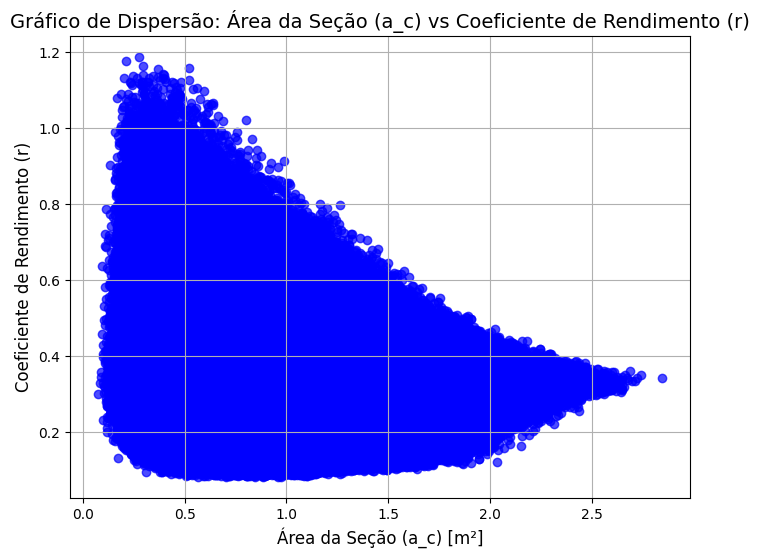

In [ ]:
# Grafico com o rendimento
# Filtrar linhas com g_0, g_1 e g_2 negativos
df = df[(df['g_0'] <= 0) & (df['g_1'] <= 0) & (df['g_2'] <= 0)]

# Mostrar as primeiras 10 linhas para verificar se as linhas foram removidas
print(df.head(10))  # Exibe as primeiras 10 linhas

# Plotar gráfico de dispersão (scatter plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['a_c (m²)'], df['r'], color='blue', alpha=0.7)
plt.title("Gráfico de Dispersão: Área da Seção (a_c) vs Coeficiente de Rendimento (r)", fontsize=14)
plt.xlabel("Área da Seção (a_c) [m²]", fontsize=12)
plt.ylabel("Coeficiente de Rendimento (r)", fontsize=12)
plt.grid(True)
plt.show()

        p (kN)   e_p (m)  bf_t (m)  hf_t (m)    bw (m)     h (m)  bf_b (m)  \
0   826.288197  0.258439  0.553906  0.933884  0.572074  0.730242  0.842346   
1   299.075664  0.787497  0.554044  0.444215  0.980907  0.793252  0.660663   
2   131.446974  0.081384  0.846190  0.884322  0.443428  0.302944  0.396005   
3   138.013664  0.426284  0.945733  0.785324  0.887655  0.573855  0.836581   
4   882.960958  0.716598  0.276619  0.395943  0.456628  0.604004  0.455227   
5   891.781973  0.048342  0.419890  0.989939  0.878604  0.283717  0.362632   
8   811.122845  0.123674  0.640443  0.959016  0.868258  0.483376  0.238192   
9   693.842770  0.365763  0.643790  0.104240  0.987272  0.868111  0.142913   
10  522.430291  0.230032  0.714248  0.987811  0.773937  0.551160  0.711115   
11  565.358000  0.768081  0.307286  0.714427  0.475472  0.977599  0.388033   

    hf_b (m)  a_c (m²)         r           rig       g_0       g_1       g_2  
0   0.616502  1.454345  0.423005  2.592891e+06 -0.962000 -0.98

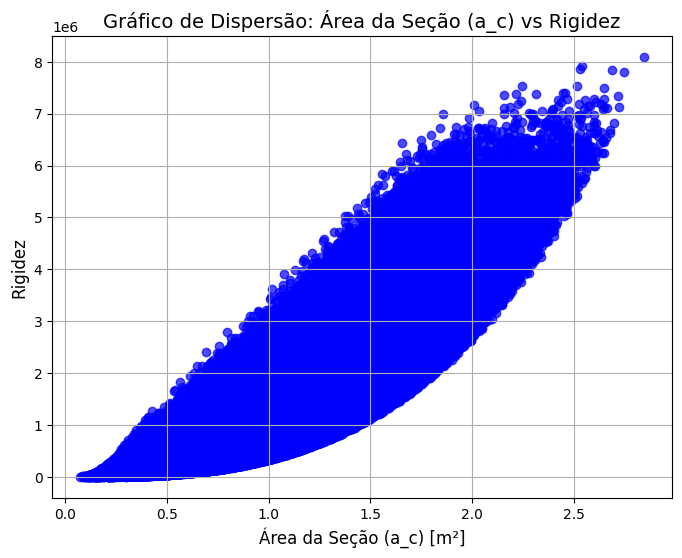

In [ ]:
# Grafico com a rigidez
# Filtrar linhas com g_0, g_1 e g_2 negativos
df = df[(df['g_0'] <= 0) & (df['g_1'] <= 0) & (df['g_2'] <= 0)]

# Mostrar as primeiras 10 linhas para verificar se as linhas foram removidas
print(df.head(10))  # Exibe as primeiras 10 linhas

# Plotar gráfico de dispersão (scatter plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['a_c (m²)'], df['rig'], color='blue', alpha=0.7)
plt.title("Gráfico de Dispersão: Área da Seção (a_c) vs Rigidez", fontsize=14)
plt.xlabel("Área da Seção (a_c) [m²]", fontsize=12)
plt.ylabel("Rigidez", fontsize=12)
plt.grid(True)
plt.show()